# **CIBA - PYTHON INTERMEDIO**

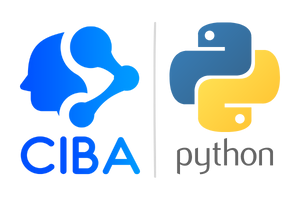


# SESIÓN 2 - TEMA 3

Contenido:
 * Clustering
  * Clustering K-Means
  * Hierarchical Clustering
 * Principal Component Analysis (PCA)

# 1. CLUSTERING  
La agrupación en clústeres pertenece a las técnicas de aprendizaje automático no supervisadas.

La tarea principal de la agrupación en clústeres es descubrir grupos "naturales" en un conjunto de datos sin etiquetar. Esta es una tarea importante en el análisis de datos, ya que se utiliza en muchas aplicaciones científicas, de ingeniería y comerciales. La aplicación más conocida de la agrupación en clústeres es la segmentación de clientes (para un marketing eficiente), la segmentación de imágenes y la agrupación de documentos.
Hay muchos algoritmos de agrupamiento que se pueden dividir en dos tipos principales: jerárquicos y particionales.

* Los algoritmos <u> jerárquicos </u> dividen de forma recursiva un conjunto de datos en un subconjunto más pequeño hasta que un subconjunto contiene solo un elemento. Esto se puede representar con un dendrograma que parece un árbol. Puede construirse desde las hojas hasta el suelo (enfoque aglomerativo) o desde la raíz hasta las hojas (enfoque divisivo). En la agrupación jerárquica, no es necesario que especifique la cantidad de agrupaciones, pero debe definir una condición de terminación para el proceso de división / fusión. </li>

* <u>Partitional</u> Los algoritmos dividen un conjunto de datos en varios subconjuntos (grupos) según un criterio determinado. Para algunos algoritmos, el número de clústeres debe definirse a priori (por ejemplo, K-Means) y para otros no (DBSCAN). Definir el número de clústeres antes de ejecutar un algoritmo a menudo requiere un conocimiento de dominio específico que a menudo es un desafío (o incluso imposible) en muchas aplicaciones. Esto condujo al desarrollo de muchas heurísticas y enfoques simplificados que ayudaron a los analistas sin conocimiento del dominio a elegir el número apropiado de clústeres. </li>

Existe una gran cantidad de algoritmos de agrupamiento y, actualmente, no hay uno que domine a los demás. La elección del mejor depende de la base de datos en sí, del dominio de la aplicación y de los requisitos y expectativas del cliente.
Este cuaderno se centra en tres algoritmos de partición: K-Means, DBSCAN y Affinity Propagation. Todos están implementados en una conocida biblioteca de Python: Scikit-Learn.

In [220]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
# Manipulación y tratamiento de Datos
import pandas as pd
import numpy as np
from numpy import unique

# escalado de datos
from sklearn import preprocessing

# Visualización de Datos
import matplotlib.pyplot as plt

# Modelación de Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

                                 
# CONFIGURACIÓN
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<a id = "3"></a><br>
## Cargando Dataset

In [222]:
data = pd.read_csv('/content/drive/MyDrive/CLUBS DE APRENDIZAJE/CLUB PYTHON/PYTHON INTERMEDIO/Materiales Intermedio/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [224]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


## 1.1. CLUSTERING K-MEANS

Para encontrar un número apropiado de grupos, se utilizará el método del codo. En este método para este caso, se calculará la inercia para un número de grupos entre 2 y 10. La regla es elegir el número de agrupaciones en las que ve un nudo o "un codo" en el gráfico.

### Método del codo

El `KElbowVisualizer` implementa el método "codo" para ayudar a los científicos de datos a seleccionar la cantidad óptima de clústeres ajustando el modelo con un rango de valores para $K$. Si el gráfico de líneas se parece a un brazo, entonces el "codo" (el punto de inflexión en el curva) es una buena indicación de que el modelo subyacente se ajusta mejor en ese punto. En el visualizador, el "codo" se anotará con una línea discontinua.

Para demostrarlo, en el siguiente ejemplo, `KElbowVisualizer` ajusta(`fit`) el modelo `KMeans()` para un rango de valores $K$ de 1 a 12 en un conjunto de datos bidimensional de muestra con 8 grupos de puntos aleatorios. Cuando el modelo se ajusta con 8 clústeres, podemos ver una línea que anota el "codo" en el gráfico, que en este caso sabemos que es el número óptimo.

In [225]:
df=data.copy()
df.drop(['CustomerID','Gender'], axis=1, inplace=True)
# Escalado de datos
df = pd.DataFrame(preprocessing.normalize(df))
df.columns=[ 'Age', 'Annual Income','Spending Score']
df.head()

,Age,Annual Income,Spending Score
0,0.41,0.33,0.85
1,0.25,0.18,0.95
2,0.76,0.61,0.23
3,0.28,0.20,0.94
4,0.58,0.32,0.75


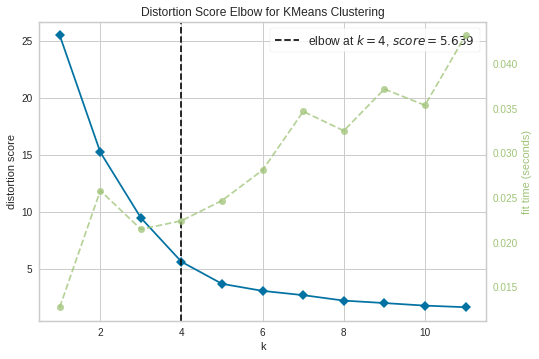

In [226]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Creamos nuestro modelo de clustering, el modelo Kmeans()
model = KMeans()

# Usamos el Elbow para encontrar el k óptimo
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(df)        # Ajustar los datos a la visualizador
visualizer.show();        

De forma predeterminada, la métrica del parámetro de puntuación se establece en distorsión, que calcula la suma de las distancias al cuadrado desde cada punto hasta su centro asignado. Sin embargo, también se pueden usar otras dos métricas con KElbowVisualizer: `silhouette` y `calinski_harabasz`. La puntuación de silueta calcula el coeficiente de silueta medio de todas las muestras, mientras que la puntuación de calinski_harabasz calcula la relación de dispersión entre y dentro de los grupos.

El `KElbowVisualizer` también muestra la cantidad de tiempo para entrenar el modelo de agrupación por K como una línea verde discontinua, pero se puede ocultar configurando `timings=False`. En el siguiente ejemplo, usaremos la puntuación `silhouette` y ocultaremos el tiempo para ajustar el modelo.

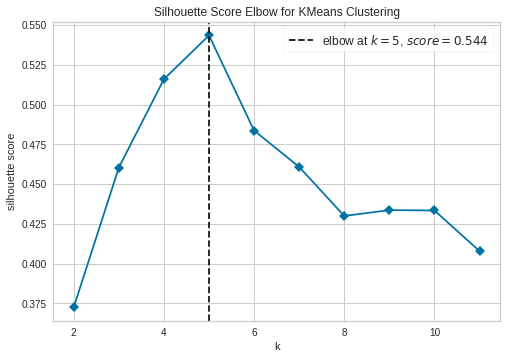

In [227]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show();  

De forma predeterminada, el parámetro `locate_elbow` se establece en Verdadero, que encuentra automáticamente el "codo" que probablemente corresponde al valor óptimo de k utilizando el "algoritmo de detección del punto de inflexión". Sin embargo, los usuarios pueden desactivar la función configurando `locate_elbow=False`. 

In [228]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(df) # Inicializamos y entrenamos K-Means model

KM5_clustered = data.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # añadir etiquetas a los puntos

In [229]:
KM5_clustered

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,3
197,198,Male,32,126,74,4
198,199,Male,32,137,18,3


Los centros de cluster

In [230]:
centers = KM_5_clusters.cluster_centers_

centers

array([[0.60468188, 0.57587321, 0.53687829],
       [0.31092997, 0.30556069, 0.88978774],
       [0.85177967, 0.44590725, 0.21449776],
       [0.41187737, 0.87853247, 0.18142573],
       [0.29111142, 0.69473093, 0.64559896]])

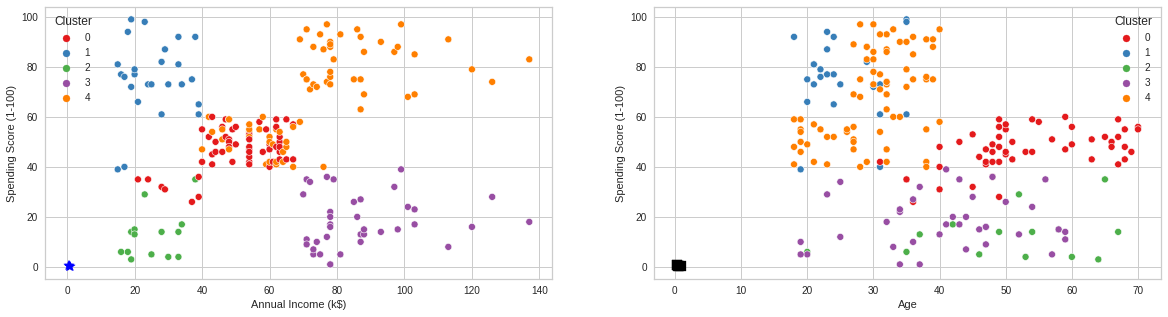

In [231]:
import seaborn as sns
fig1, (axes) = plt.subplots(1,2,figsize=(20,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='*', s=100, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=100, c="black")
plt.show();

### Coeficiente y visualización silhouette

El coeficiente de silueta se utiliza cuando se desconoce la verdad sobre el terreno del conjunto de datos y calcula la densidad de los clústeres calculados por el modelo. El puntaje se calcula promediando el coeficiente de silueta para cada muestra, calculado como la diferencia entre la distancia promedio dentro del grupo y la distancia media del grupo más cercano para cada muestra, normalizada por el valor máximo. Esto produce una puntuación entre 1 y -1, donde 1 son clústeres muy densos y -1 es un agrupamiento completamente incorrecto.

El visualizador de silueta muestra el coeficiente de silueta para cada muestra por grupo, visualizando qué grupos son densos y cuáles no. Esto es especialmente útil para determinar el desequilibrio de grupos o para seleccionar un valor para K comparando varios visualizadores.

Silhouette Score: Esta es una mejor medida para decidir el número de grupos que se formularán a partir de los datos. 

In [232]:
score = metrics.silhouette_score(df, KM_5_clusters.labels_)

print("Score = ", score)

Score =  0.5435000932824923


Esta función devuelve el coeficiente de silueta para cada muestra.

El mejor valor es 1 y el peor valor es -1. Los valores cercanos a 0 indican grupos superpuestos.

In [233]:
score1 = metrics.silhouette_samples(df, KM_5_clusters.labels_, metric='euclidean')
print("Score = ", score1)

Score =  [ 0.61374076  0.70177541  0.32534066  0.73092279  0.03976512  0.73792868
  0.64648781  0.69708472  0.55410733  0.71182048  0.55016512  0.71314724
  0.56448432  0.75387665  0.49191869  0.74264054  0.44369769  0.74674854
  0.04562053  0.73788332  0.55027418  0.74538272  0.63136746  0.69608166
  0.61036286  0.73619868  0.43431022  0.40943998  0.60736157  0.71885449
  0.61980055  0.65637702  0.57477443  0.62856846  0.48930362  0.64428295
  0.10613568  0.55571682  0.62301989  0.4735329  -0.05185126  0.63725788
  0.6452779   0.01251924  0.33108025  0.15920809  0.52108871  0.3253032
  0.05725159  0.11647015  0.57578971  0.1517272   0.25300942  0.56151395
  0.69279126  0.70628696  0.64426815  0.38755303  0.49331869  0.70625703
  0.55041991  0.57900585  0.5864774   0.54922817  0.65442602  0.52302764
  0.45495387  0.5226475   0.53205777  0.18624095  0.59053233  0.66221732
  0.69967038  0.66792892  0.70657973  0.64603415  0.39653985  0.250652
  0.69441973  0.62449665  0.69574722  0.09669

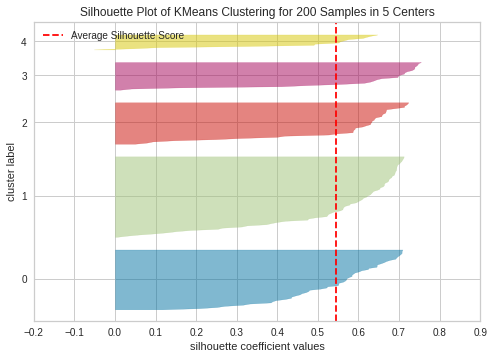

In [234]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl


# Cree una instancia del modelo de agrupamiento y el visualizador
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df)        # Usamos el Fit de la data para visualizar
visualizer.show();

## 1.2. HIERARCHICAL CLUSTERING

La agrupación jerárquica es una alternativa a los algoritmos de agrupación basados en prototipos. La principal ventaja de la agrupación jerárquica es que tampoco se necesita especificar el número de agrupaciones. Además, permite el trazado de dendogramas. Los dendogramas son visualizaciones de una agrupación jerárquica binaria.

In [235]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

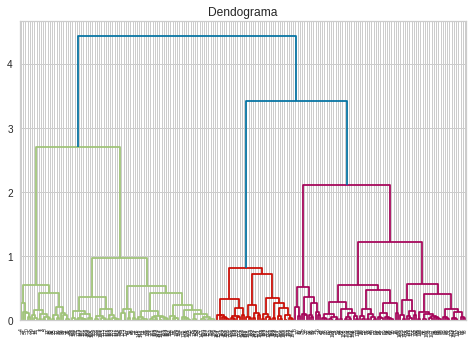

In [236]:
# Creamos el dendograma para encontrar el número óptimo de clusters
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendograma')
plt.show()

Al marcar con una linea imaginaria en el dendograma cogiendo todos los clusters formados por la linea azul, observamos que se genera 5 clusters.

In [237]:
# Ajustando Clustering Jerárquico al conjunto de datos
jerarquico = AgglomerativeClustering(n_clusters = 5, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

clust_j = jerarquico.fit_predict(df)

In [238]:
clust_j

array([3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 3, 0, 3,
       4, 3, 4, 3, 0, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 3, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [239]:
# Analizando el indicador de silueta
print('Silueta: '+str(metrics.silhouette_score(df, clust_j, metric='cosine')))

Silueta: 0.7033534397592512


In [240]:
# Cargamos la variable cluster en nuestro set de datos
df['k_jerarquico'] = clust_j
df.groupby('k_jerarquico').size()/df.shape[0]

k_jerarquico
0   0.33
1   0.33
2   0.17
3   0.12
4   0.06
dtype: float64

Text(0.5, 1.0, 'Cluster jerarquico')

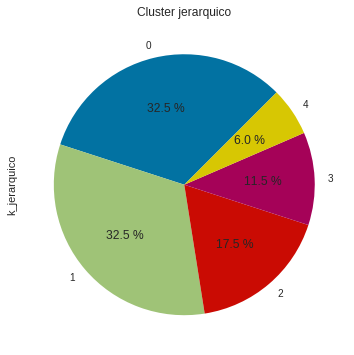

In [241]:
# Graficamos va variable cluster generada
ax = df.k_jerarquico.value_counts().plot.pie(startangle=45,
                                     autopct='%.1f %%',
                                     figsize=(8, 6))
ax.set_title("Cluster jerarquico")

# 2. PRINCIPAL COMPONENT ANALYSIS (PCA)

El análisis de componentes principales, o PCA, es un método de reducción de la dimensionalidad que se usa a menudo para reducir la dimensionalidad de grandes conjuntos de datos, mediante la transformación de un gran conjunto de variables en uno más pequeño que todavía contiene la mayor parte de la información del gran conjunto.

<a id="13"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>13.Implementación PCA </b></h2>

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">La clase `sklearn.decomposition.PCA` incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento `n_components` determina el número de componentes calculados. Si se indica `None`, se calculan todas las posibles $(min(filas, columnas)$ - 1).
<br>
Por defecto, `PCA()` centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas.

In [242]:
df=data.copy()
df.drop(['CustomerID','Gender'], axis=1, inplace=True)
# Escalado de datos
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
df =pd.DataFrame(scaler.fit_transform(df))
df.columns=[ 'Age', 'Annual Income','Spending Score']
df.head()

,Age,Annual Income,Spending Score
0,-1.42,-1.74,-0.43
1,-1.28,-1.74,1.20
2,-1.35,-1.70,-1.72
3,-1.14,-1.70,1.04
4,-0.56,-1.66,-0.40


<Figure size 1080x720 with 0 Axes>

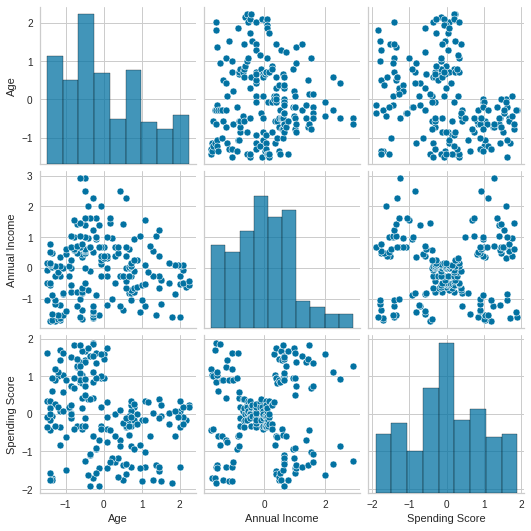

In [243]:
# Comprobación de la relación entre los Features
import seaborn as sns
background_color = "#ffffff"
fig = plt.figure(figsize=(15,10), facecolor=background_color)
sns.pairplot(df,palette="cool");

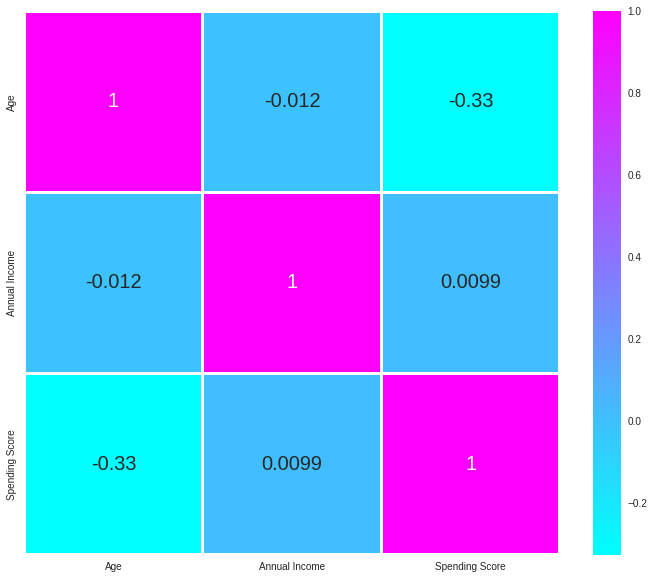

In [244]:
background_color = "#ffffff"
fig = plt.figure(figsize=(12,10), facecolor=background_color)

sns.heatmap(df.corr(), annot=True,cmap = "cool",linewidths=2,linecolor = "white",cbar=True,annot_kws={"size":20});

### Criterio de Kaiser

* ¿Con cuántas nuevas variables me voy a quedar?

* ¿Me quedaria con 2 variables? 

* ¿De 3 variables --> 2 variables?

El criterio de *Kaiser (1958)* propone retener las CP cuyos autovalores sean mayores que 1, lo cual sugiere la retención de aquellas componentes que expliquen una fracción de varianza mayor que la explicada por cada variable original

In [245]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)  # Instancio o codificas (nro de componentes = 3 = nro de variables)
pca = pca.fit(df)          # Tenemos el ACP ejecutado

Varianza explicada por cada componente principal:
[1.33465831 1.00427272 0.67614435]


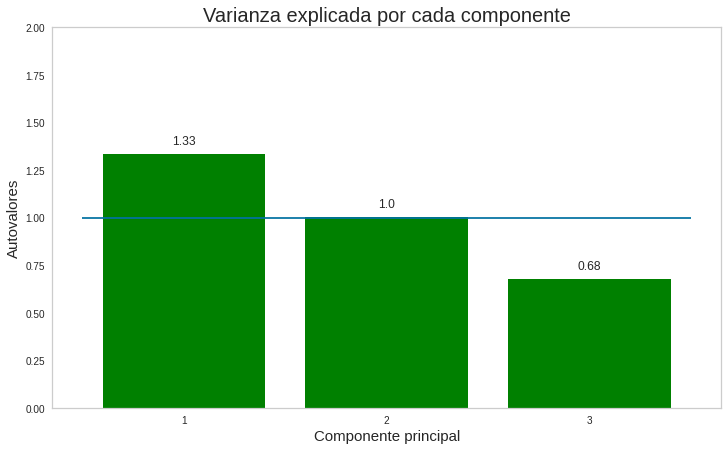

In [246]:
# Autovalores asociados a cada Componente Principal
explained_variance = pca.explained_variance_
print('Varianza explicada por cada componente principal:')
print(explained_variance)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
ax.bar(x  = np.arange(pca.n_components_) + 1,color="green", 
    height = pca.explained_variance_,)

plt.hlines(y=1, xmin=0.5, xmax=3.5,colors="b")
plt.grid()

for x, y in zip(np.arange(len(df.columns)) + 1, pca.explained_variance_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 2)
ax.set_title('Varianza explicada por cada componente',size=20)
ax.set_xlabel('Componente principal', size=15)
ax.set_ylabel('Autovalores', size=15);
fig.show()

El primer y segundo componente cumplen este criterio.

### Criterio del gráfico de sedimentación

Este gráfico muestra en el eje de ordenadas los autovalores y en el eje de abscisas los componentes. Los cambios en la pendiente nos permiten observar cuánta capacidad explicativa va aportando cada componente. Se escoge el número de componentes a partir del cual los autovalores restantes son relativamente más pequeños en comparación con él.

Proporción de varianza explicada (PVE) por cada componente principal:
[0.44266167 0.33308378 0.22425454]


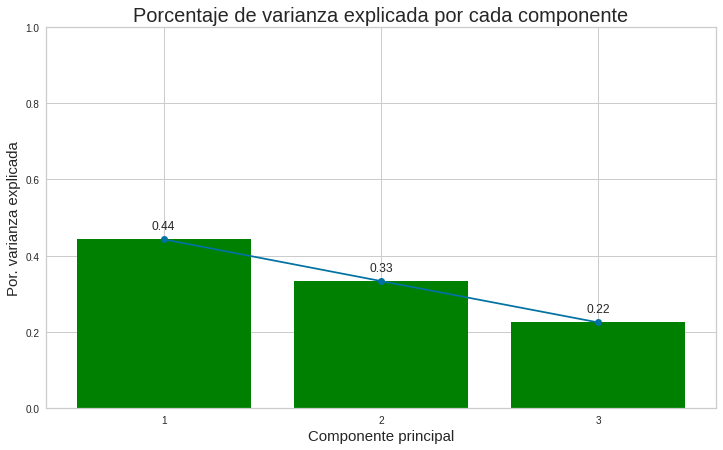

In [247]:
# Proporción de varianza explicada
PVE = pca.explained_variance_ratio_
print('Proporción de varianza explicada (PVE) por cada componente principal:')
print(PVE)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
ax.bar(x  = np.arange(pca.n_components_) + 1,color="green", 
    height = pca.explained_variance_ratio_,)

plt.plot([1,2,3], pca.explained_variance_ratio_, '-o')

for x, y in zip(np.arange(len(df.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1)
ax.set_title('Porcentaje de varianza explicada por cada componente',size=20)
ax.set_xlabel('Componente principal', size=15)
ax.set_ylabel('Por. varianza explicada', size=15);
fig.show()

El gráfico de codo nos aconseja también quedarnos con 2 componentes.

### Criterio de la Varianza Explicada

Retener los componentes necesarios hasta acumular un porcentaje aceptable de varianza explicada.

Porcentaje de varianza explicada acumulada
[0.44266167 0.77574546 1.        ]


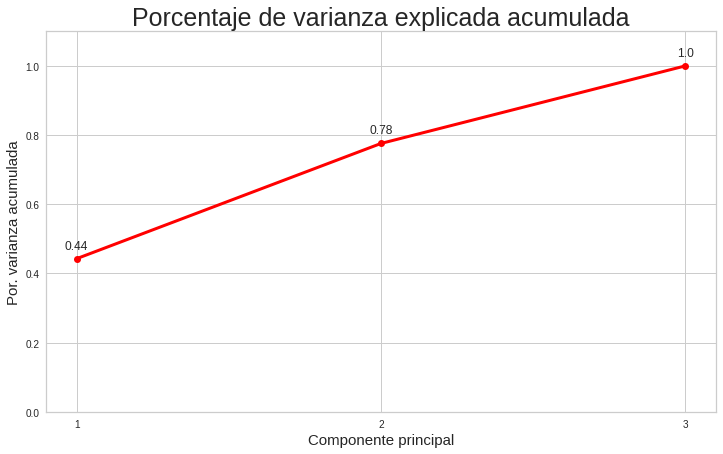

In [253]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
ax.plot(np.arange(len(df.columns)) + 1,prop_varianza_acum, marker = 'o', lw=3, color="red")

for x,y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,(x,y),
        textcoords="offset points",
        xytext=(0,10),ha='center')
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada', size=25)
ax.set_xlabel('Componente principal', size=15)
ax.set_ylabel('Por. varianza acumulada', size=15);  

De acuerdo a este ultimo criterio, se retienen 2 componentes.

**Todos los criterios ofrecen la misma conclusión, que el número de componentes a retener es 2.**

No hay ningún criterio universalmente aceptado, no obstante, el criterio más utilizado es el de los autovalores superiores a la unidad, siempre y cuando se consiga retener con estos componentes un porcentaje de varianza que se considere adecuado para sus propósitos.

In [254]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Instancio o codificas (reteniendo 2 componentes)
pca = pca.fit(df)          # Tenemos el ACP ejecutado

In [255]:
# Cargas factoriales
pca_loadings = pca.components_
# Correlaciones entre las variables y los componentes
correlaciones=pd.DataFrame(pca_loadings, columns=df.columns, index=['PC1', 'PC2'])
correlaciones

,Age,Annual Income,Spending Score
PC1,0.71,-0.05,-0.71
PC2,0.03,1.00,-0.04


In [256]:
# Contribución de las variables a los componentes principales, tambien llamado calidad de representacion o calidad de representacion por componente
correlaciones*correlaciones

,Age,Annual Income,Spending Score
PC1,0.50,0.00,0.50
PC2,0.00,1.00,0.00


In [257]:
# Scores
pca_scores = pca.transform(df) # Puntuaciones factoriales
df_plot = pd.DataFrame(pca_scores, columns=['PC1', 'PC2'], index=df.index)
df_plot.head()

,PC1,PC2
0,-0.62,-1.76
1,-1.67,-1.82
2,0.34,-1.67
3,-1.46,-1.77
4,-0.04,-1.66


In [258]:
# BIPLOT
def biplot(loadings, scores, index, columns):
    fig , ax1 = plt.subplots(figsize=(15,12))
    ax1.set_xlim(-3.5,3.5)
    ax1.set_ylim(-3.5,3.5)

    # Nombre de cada estado ubicado por puntajes para cada componente principal
    for i, index in enumerate(index):
        ax1.annotate(index, (scores[i, 0], scores[i, 1]), ha='center', color='blue')

    # Líneas de referencia
    ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
    ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
    ax1.set_xlabel('Primer Componente Principal')
    ax1.set_ylabel('Segundo Componente Principal')

    # Diagramar los vectores de cargas, superponiendo un segundo eje x, y
    ax2 = ax1.twinx().twiny() 
    ax2.set_ylim(-1,1)
    ax2.set_xlim(-1,1)
    ax2.set_xlabel('Vectores de cargas de los componentes principales', color='red')

    # Vectores de carga
    # La variable 'a' es un pequeño offset para separar las etiquetas de las flechas
    a = 1.07  
    for i, column in enumerate(columns):
        ax2.annotate(column, (loadings[0,i]*a, loadings[1,i]*a), color='red')
        ax2.arrow(0, 0, loadings[0,i], loadings[1,i], color='red')
    plt.show()

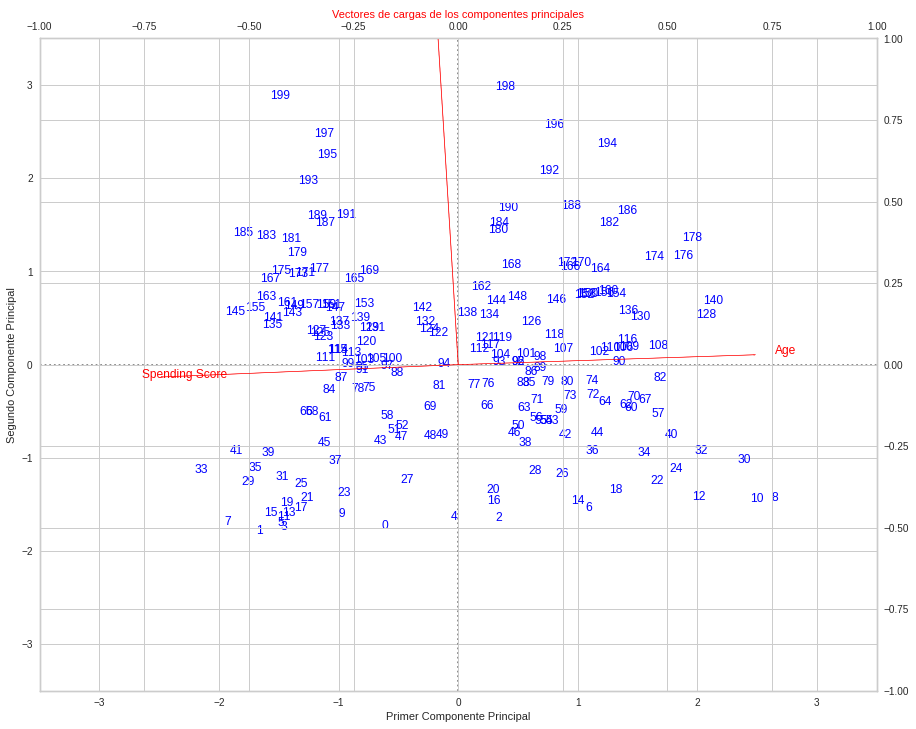

In [259]:
# Grafica de las variables y sus correlaciones con los Componentes Principales 
biplot(loadings=pca_loadings, scores=pca_scores, index=df.index, columns=df.columns)